In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

## Day 26 Lecture 2 Assignment

In this assignment, we will learn about linear regression model assumptions

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_breuschpagan

<IPython.core.display.Javascript object>

We will load the dataset below that describes the antioxidant quality of lager.

The variables are as follows:
    
The dataset contains 7 variables :

- tpc - Total phenolic content
- ma - melanoidin content
- dsa - DPPH radical scavenging activity
- asa - ABTS radical cation scavenging activity
- orac - Oxygen radical absorbance activity
- rp - Reducing Power
- mca - Metal Chelaing Activity

In [3]:
lager = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lager_antioxidant_reg.csv"
)

lager.head()

,beer,tpc,ma,dsa,asa,orac,rp,mca
0,1,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,2,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,3,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,4,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,5,146.03,11.72,0.64,0.90,3.18,0.47,9.39


<IPython.core.display.Javascript object>

We would like to predict the level of total phenolic content using the remaining 6 variables.

Start by removing the beer column since this column is the id for the observations.

In [6]:
#answer below:# answer below:
lager = lager.drop(columns = ['beer'])
# answer below:




<IPython.core.display.Javascript object>

Split the data into train and test subsets. Select 25% of the data to be in the test subset. Use `tpc` as the y variable.

In [7]:
# answer below:
X = lager.drop(columns=["tpc"])
y = lager["tpc"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

<IPython.core.display.Javascript object>

Next, we'll generate a linear model and make a residual vs. fit (homoscedasticity) plot. All Gauss-Markov assumptions should be evaluated on the training set.

How much heteroscedasticity is exhibited in the model?

In [9]:
#answer below:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<IPython.core.display.Javascript object>

In [14]:
y_pred = model.predict(X_train)

<IPython.core.display.Javascript object>

In [15]:
resid = y_pred - y_train

<IPython.core.display.Javascript object>

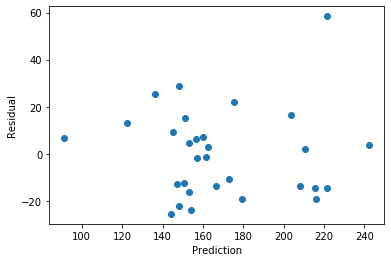

<IPython.core.display.Javascript object>

In [16]:
plt.scatter(y_pred, resid)
plt.xlabel("Prediction")
plt.ylabel("Residual")
plt.show()

Compute the VIF for all features in the model. You will need to add a constant to your data (make a new copy just for this) to compute this with statsmodels.

How collinear are your features?

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor# answer below:
X = sm.add_constant(X)

vifs = []
for i in range(X.shape[1]):
    vif = variance_inflation_factor(X.values, i)
    vifs.append(vif)

pd.Series(vifs, index=X.columns)
#not terribly colinear

const    25.231110
ma        1.408874
dsa       2.752283
asa       1.824640
orac      1.631315
rp        2.357123
mca       1.485338
dtype: float64

<IPython.core.display.Javascript object>

Show a histogram of your error, and then plot the qq-plot for our errors (make sure to use a standardized line to compare them appropriately to the standard distribution.)

Remember to use training data.

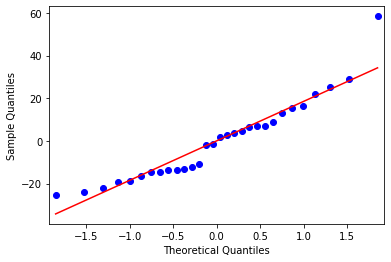

<IPython.core.display.Javascript object>

In [23]:
# answer below:
sm.qqplot(resid, line = 's')
plt.show()


(array([5., 8., 2., 7., 3., 2., 2., 0., 0., 1.]),
 array([-25.53869849, -17.14134405,  -8.74398961,  -0.34663517,
          8.05071928,  16.44807372,  24.84542816,  33.2427826 ,
         41.64013704,  50.03749148,  58.43484592]),
 <a list of 10 Patch objects>)

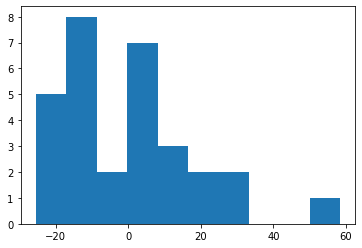

<IPython.core.display.Javascript object>

In [21]:
# answer below:
plt.hist(resid)


Plot the actual test data against test predictions to see how well your model predicts new data.

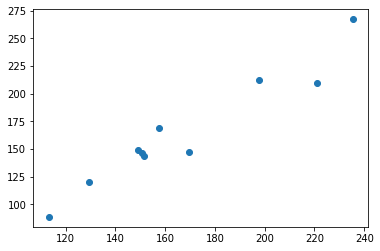

<IPython.core.display.Javascript object>

In [22]:
# answer below:
y_pred = model.predict(X_test)
plt.scatter(y_pred, y_test)